In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Libraries
import numpy as np 
import pandas as pd
import cv2
from glob import glob 
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import math
import pandas as pd
import os

In [3]:
#Loading the Dataset
!ls "/content/drive/MyDrive/AIML/projects/CV1"

model.h5  model.json  prediction  test	train


In [4]:
# Loading train & test data
pathToTrain = "/content/drive/MyDrive/AIML/projects/CV1/train"
testPath = "/content/drive/MyDrive/AIML/projects/CV1/test"

In [5]:
# import needed libraries
import os as os
from PIL import Image
from array import array
import cv2 as cv2
from glob import glob
import time
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from keras.utils import np_utils
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras import optimizers
from tensorflow.keras import optimizers
from keras import regularizers
from keras import layers
seed = 7
np.random.seed(seed)

# for API
from keras.models import Model
from keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Activation

from tensorflow.python.keras.layers import Dense, Dropout, InputLayer, BatchNormalization, Flatten
from keras.utils.np_utils import to_categorical
from keras import backend as K

# Analyse the dimensions of the data , Visualise the data and Reading Images

In [6]:
#Assigning to List
listing = os.listdir( pathToTrain ) 
#Calculating No of Folders in train data
num_folders = len(listing)
#Print the data
print ( num_folders)
trainArray = [[]]
trainImagesPaths = []
trainImagesCategories = []
trainImg = []
#Scaling the image size
scaleTo = 71
seed = 7

t0=time.time()

for imgFolder in listing:
  print(imgFolder)
  path = "/content/drive/MyDrive/AIML/projects/CV1/train/" + imgFolder + '/'
  files = os.listdir(path) 
  for imgFile in files:
    imgPath = path + imgFile
    trainArray.append([imgPath, imgFolder]) # image path, image folder
    trainImagesPaths.append(imgPath) # paths to images
    trainImagesCategories.append(imgFolder) # labels
    
    trainImg.append(cv2.resize(cv2.imread(imgPath), (scaleTo, scaleTo))) # images
    
t1=time.time()
print(t1-t0," seconds")

12
Black-grass
Charlock
Cleavers
Common Chickweed
Common wheat
Fat Hen
Loose Silky-bent
Maize
Scentless Mayweed
Shepherds Purse
Small-flowered Cranesbill
Sugar beet
1346.1455535888672  seconds


In [7]:

trainImgNParray = np.asarray(trainImg) # create an array of all the images (not the paths)
trainlabel = pd.DataFrame(trainImagesCategories) # dataframe of all the categories matching each image

# check the length of the training images for confirmation
len(trainImgNParray)

4767

In [8]:
trainImgNParray = np.asarray(trainImg) # create an array of all the images (not the paths)
trainlabel = pd.DataFrame(trainImagesCategories) # dataframe of all the categories matching each image

In [9]:

# check the length of labels for confirmation
len(trainlabel)

4767

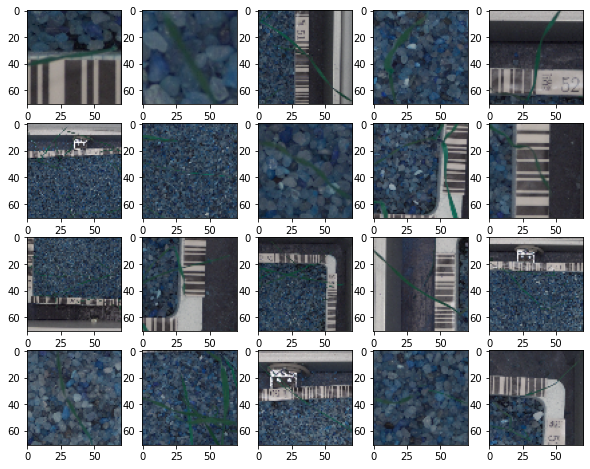

In [10]:
# displaying training images
plt.rcParams['figure.figsize'] = (10.0,8.0)
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(trainImg[i])

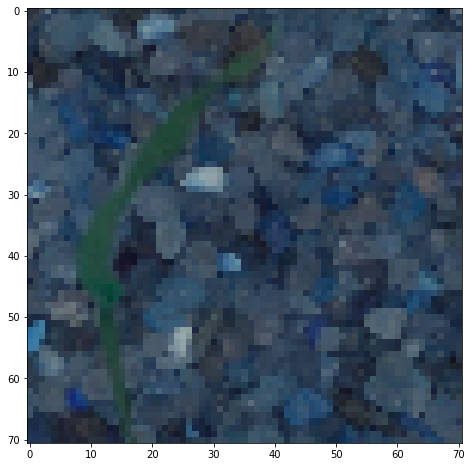

In [11]:
# displaying random image
plt.imshow(trainImg[3])

In [12]:
# shape of image
im = trainImg[3]
im.shape

(71, 71, 3)

In [13]:
# array shape of image
trainImgNParray.shape

(4767, 71, 71, 3)

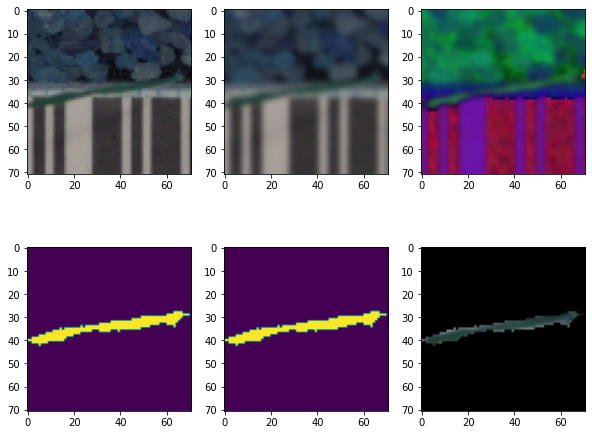

In [14]:
#Image Processing
clearTrainImg = []
examples = []; getEx = True
for img in trainImgNParray:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
    
    # Convert to HSV image
    hsvImg = cv2.cvtColor(blurImg, cv2.COLOR_BGR2HSV)  
    
    # Create mask (parameters - green color range)
    lower_green = (25, 40, 50)
    upper_green = (75, 255, 255)
    mask = cv2.inRange(hsvImg, lower_green, upper_green)  
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    # Create bool mask
    bMask = mask > 0  
    
    # Apply the mask
    clear = np.zeros_like(img, np.uint8)  # Create empty image
    clear[bMask] = img[bMask]  # Apply boolean mask to the origin image
    
    clearTrainImg.append(clear)  # Append image without backgroung
    
    # Show examples
    if getEx:
        plt.subplot(2, 3, 1); plt.imshow(img)  # Show the original image
        plt.subplot(2, 3, 2); plt.imshow(blurImg)  # Blur image
        plt.subplot(2, 3, 3); plt.imshow(hsvImg)  # HSV image
        plt.subplot(2, 3, 4); plt.imshow(mask)  # Mask
        plt.subplot(2, 3, 5); plt.imshow(bMask)  # Boolean mask
        plt.subplot(2, 3, 6); plt.imshow(clear)  # Image without background
        getEx = False

clearTrainImg = np.asarray(clearTrainImg)

Classes: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
Number of classes: 12


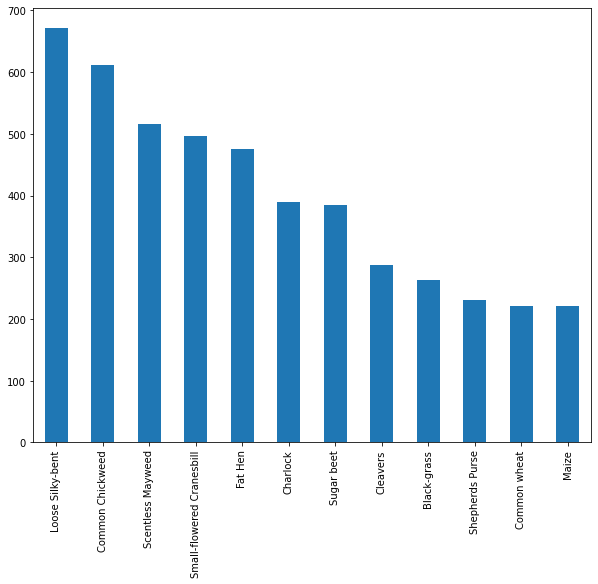

In [15]:
# Encode labels and create classes
le = preprocessing.LabelEncoder()
le.fit(trainlabel[0])
print("Classes: " + str(le.classes_))
encodeTrainLabels = le.transform(trainlabel[0])

# Make labels categorical
clearTrainLabel = np_utils.to_categorical(encodeTrainLabels)
num_clases = clearTrainLabel.shape[1]
print("Number of classes: " + str(num_clases))

# Plot of label types numbers
trainlabel[0].value_counts().plot(kind='bar')

**Not all the species have equal number of images. The plant species 'Loose Silky-bent' has the highest number of images ranging between 671 images roughly. Whereas, the 'Maize' and 'Common wheat' plant species has the least number of images with around 221 images. The dataset is imbalanced.**

In [16]:
#Viewing the distribution of number of images in each class.Class Index Starting from 0.
classes1 = {}
for class_name in os.listdir(pathToTrain):
    classes1[class_name] = len(os.listdir(os.path.join(pathToTrain, class_name)))
print(classes1)

{'Black-grass': 263, 'Charlock': 390, 'Cleavers': 287, 'Common Chickweed': 611, 'Common wheat': 221, 'Fat Hen': 475, 'Loose Silky-bent': 671, 'Maize': 221, 'Scentless Mayweed': 516, 'Shepherds Purse': 231, 'Small-flowered Cranesbill': 496, 'Sugar beet': 385}


In [17]:
import glob
# label_names index starting from 0,1,2...11
paths = glob.glob(pathToTrain+"/*")
label_names = [os.path.split(x)[-1] for x in paths]

print("Total labels: {}".format(len(label_names)))
print("Labels: {}".format(label_names))

Total labels: 12
Labels: ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


# Exploring Data

**Now, let's explore the images to see how they look, their shape, size, colors, and so on. Firstly, we will view the images of all the 12 different plant species.**

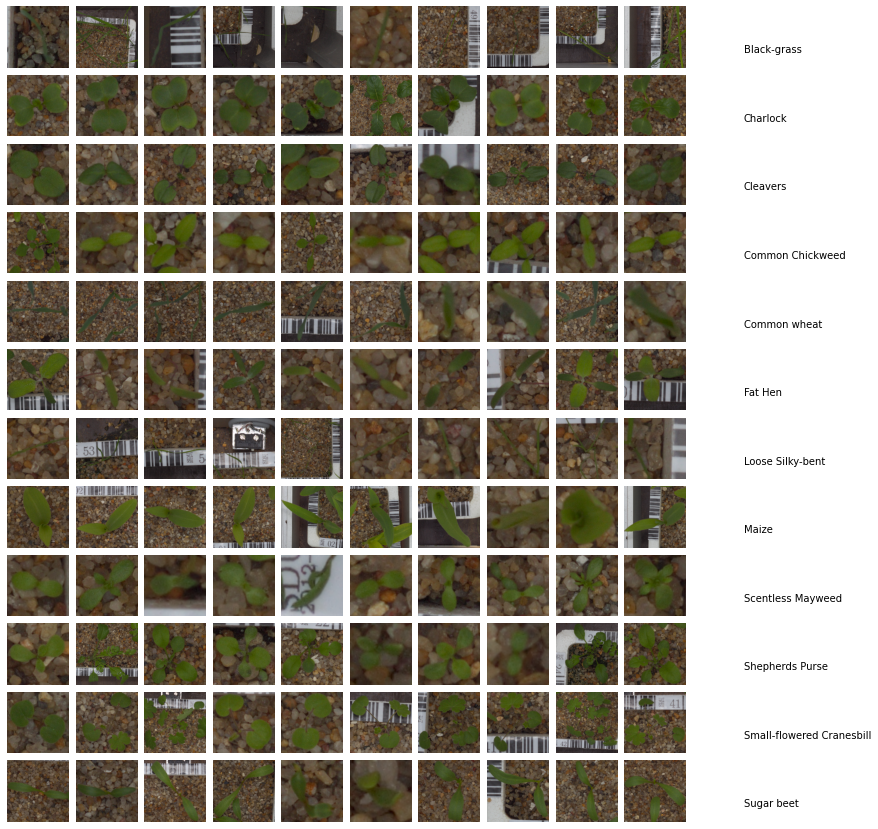

In [18]:
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(1, (20, 15))
grid = ImageGrid(fig, 111, nrows_ncols=(12, 10), axes_pad=0.1)

n_img_class = []
counter = 0
for idx, label in enumerate(label_names):
    paths = glob.glob(os.path.join(pathToTrain, label, "*.png"))
    n_img_class.append([label, len(paths)])
    perm = np.random.choice(len(paths), size=10)

    title = True
    for ii in perm:
        ax = grid[counter]
        if title:
            ax.text(1800, 105, label, verticalalignment="center")
            title = False
        img = cv2.imread(paths[ii])
        img = cv2.resize(img, (150, 150))
        ax.axis("off")
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        counter += 1
        
plt.show()

**Most of the species look similar and seems difficult to classify by humans. Let's see how machines can do this easily.**

In [19]:

# check the data type of the training images
clearTrainImg.dtype

dtype('uint8')

# Train tune and test AIML image classifier model using:

• Supervised learning algorithms for training

• Neural networks for training

• CNN for training

# Image Classification using Supervised Learning Techniques

**Random Forest Classifier Model**

In [20]:
from sklearn.model_selection import train_test_split
# I used a 90% - 10% test train split, stratified according to training labels
trainX, testX, trainY, testY = train_test_split(clearTrainImg, clearTrainLabel, 
                                                test_size=0.10, random_state=seed, 
                                                stratify = clearTrainLabel)

SL_Train_X,SL_Valid_X,SL_Train_Y,SL_Valid_Y= train_test_split( trainX , trainY ,test_size=0.1,random_state=seed)

In [21]:
SL_Train_X.shape



(3861, 71, 71, 3)

In [22]:
SL_Valid_X.shape

(429, 71, 71, 3)

In [24]:
#Flatten the Image

# Train data
x_train_SL = []
for i in range(3861):
      x_train_SL.append(SL_Train_X[i,:].flatten())

# Test data
x_test_SL = []
for i in range(429):
      x_test_SL.append(SL_Train_X[i,:].flatten())



# Shape of data

print("\n Training data",len(x_train_SL))
print("\n Training Target data",len(SL_Train_Y))
print("\n Test data",len(x_test_SL))
print("\n Testing target data",len(SL_Valid_Y))


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model_RF = RandomForestClassifier(n_estimators=100, 
                                  criterion='gini', 
                                  max_depth=None,
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  min_weight_fraction_leaf=0.0, 
                                  max_features='auto',
                                  max_leaf_nodes=None, 
                                  min_impurity_decrease=0.0,
                                  min_impurity_split=None, 
                                  bootstrap=True, 
                                  oob_score=False, 
                                  n_jobs=-1, 
                                  random_state=7, 
                                  verbose=0, 
                                  warm_start=False,
                                  class_weight=None,
                                  ccp_alpha=0.0, 
                                  max_samples=None)
model_RF.fit(x_train_SL, SL_Train_Y)

#Accuracy
pred_RF = model_RF.predict(x_test_SL)
RF_Train = model_RF.score(x_train_SL,SL_Train_Y)
RF_Test = accuracy_score(SL_Valid_Y,pred_RF)     


print("\nRandom Forest: Train Accuracy",RF_Train)
print("\nRandom Forest: Test Accuracy",RF_Test)


 Training data 3861

 Training Target data 3861

 Test data 429

 Testing target data 429

Random Forest: Train Accuracy 0.9997409997409997

Random Forest: Test Accuracy 0.10256410256410256


# Image Classification using Artificial Neural Network (ANN)

**An ANN has hundreds or thousands of artificial neurons called processing units, which are interconnected by nodes. These processing units are made up of input and output units. The input units receive various forms and structures of information based on an internal weighting system, and the neural network attempts to learn about the information presented to produce one output report. Just like humans need rules and guidelines to come up with a result or output, ANNs also use a set of learning rules called backpropagation, an abbreviation for backward propagation of error, to perfect their output results.**

# Training the ANN Classifier Model

Building the neural network model, fitting the training data, testing it and providing model summary

Initialize a sequential model again

1.   Define a sequential model
2.   Added 4 Dense layers
3.   Hidden Dense Layer Activation: "relu"
4.   Output Dense layer Activation: "softmax"
5.   Optimizer : Adam
6.   Loss : categorical_crossentropy
7.   Batch Size : 32
8.   learning_rate = 1e-3
9.   epochs = 20
10.  Batch Normalization : Speed Up the Training 
11.  Dropout:  Reduce overfitting and improve generalization error 

In [27]:
# Neural Network Classifier

NN_train_X=trainX.reshape(trainX.shape[0],15123)
NN_test_X=testX.reshape(testX.shape[0],15123)


#Normalising
NN_train_X = NN_train_X/255.0
NN_test_X = NN_test_X/255.0


print('Training Set',NN_train_X.shape,trainY.shape)
print('Test Set',NN_test_X.shape,testY.shape)

from keras.utils import np_utils
NN_y_train = np_utils.to_categorical(trainY)
NN_y_test = np_utils.to_categorical(testY)

num_classes = NN_y_test.shape[1]

#Model Creation

import keras
from keras import  losses
from keras.layers import  Dropout,MaxPooling2D
from keras.layers import  BatchNormalization
from keras.models import  Sequential
from keras.layers import Dense
from tensorflow.keras import optimizers

def nn_model():
    model = Sequential()
    model.add(BatchNormalization(input_shape=(15123,)))

    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(layers.Dense(num_clases, activation='softmax'))

    #model Compile
    sgd = optimizers.Adam(learning_rate=1e-3)
    model.compile(loss = losses.categorical_crossentropy,optimizer=sgd,metrics=['accuracy'])
    return model

model= nn_model()
model.summary()

training_history= model.fit(NN_train_X, trainY, validation_data = (NN_test_X,testY), epochs=20, batch_size=32, verbose=2)

Training Set (4290, 15123) (4290, 12)
Test Set (477, 15123) (477, 12)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_8 (Batch (None, 15123)             60492     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                483968    
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 32)                128       
_________________________________________________________________
dense_9 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
__________________________________________________

# Evaluating the ANN Classifier Model

In [28]:
ann_loss, ann_accuracy = model.evaluate(NN_test_X,testY, verbose=1)
print('Test loss:', ann_loss)
print('Test accuracy:', ann_accuracy)

15/15 [==============================] - 0s 6ms/step - loss: 1.0500 - accuracy: 0.6667
Test loss: 1.049989104270935
Test accuracy: 0.6666666865348816


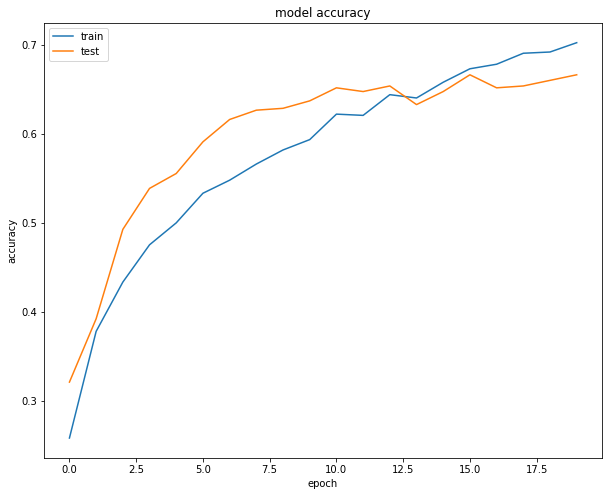

In [29]:
#summarize history for accuracy
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

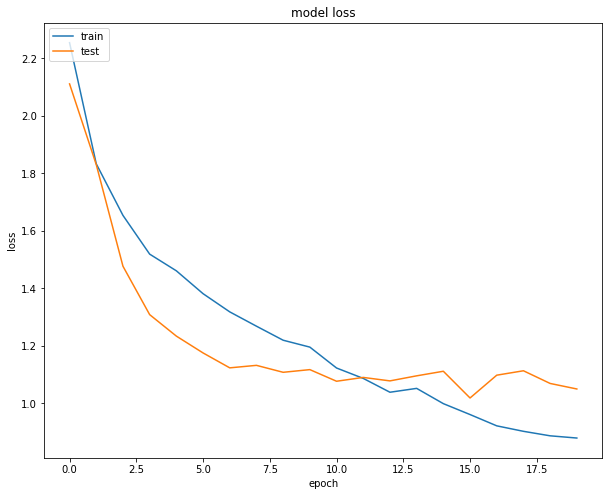

In [30]:
# summarize history for loss
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [31]:
# importing ImageDataGenerator
# ImageDataGenerator is used augment your images in real-time while your model is still training!
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=180,
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1,  
        horizontal_flip=True, 
        vertical_flip=True
    )  
datagen.fit(trainX)


# Image Classification using Convolution Neural Network (CNN)

**A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other.**

# Training the CNN Classifier Model

1.   Define a sequential model
2.   Added 4 Convolution layers
3.   Each Convolution Layer Activation: "relu"
4.   Output Dense layer Activation: "softmax"
5.   Optimizer : Adam
6.   Loss : categorical_crossentropy
7.   Batch Size : 75
8.   learning_rate = 1e-3
9.   epochs = 35
10.  Max Pooling: max pooling reduces the dimensionality of images by reducing the number of pixels in the output from the previous convolutional layer.
11.  Flatten layer before Dense Layer : Flattening is converting the data into a 1-dimensional array for inputting it to the next layer.

In [103]:
CNN_model = Sequential() 
CNN_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(scaleTo, scaleTo, 3))) 
CNN_model.add(layers.MaxPooling2D((2, 2))) # to downsample the feature maps
CNN_model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
CNN_model.add(layers.MaxPooling2D((2, 2))) 
CNN_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
CNN_model.add(layers.MaxPooling2D((2, 2))) 
CNN_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
CNN_model.add(layers.MaxPooling2D((2, 2))) 
CNN_model.add(layers.Flatten()) 
CNN_model.add(layers.Dense(64, activation='relu'))
CNN_model.add(layers.Dense(num_clases, activation='softmax'))
CNN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

CNN_model_A = CNN_model
CNN_model_A.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 69, 69, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 5, 5, 128)        

# Evaluating the CNN Classifier Model

In [104]:
t0=time.time()
history_A = CNN_model_A.fit(datagen.flow(trainX, trainY, batch_size=75), epochs=35, validation_data=(testX, testY), verbose=2)
t1=time.time()
print(t1-t0," seconds")

# Final evaluation of the model
scores = CNN_model_A.evaluate(testX, testY, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/35
58/58 - 8s - loss: 2.5572 - accuracy: 0.2765 - val_loss: 1.8226 - val_accuracy: 0.3711
Epoch 2/35
58/58 - 7s - loss: 1.6201 - accuracy: 0.4448 - val_loss: 1.4052 - val_accuracy: 0.5136
Epoch 3/35
58/58 - 7s - loss: 1.3177 - accuracy: 0.5413 - val_loss: 1.1913 - val_accuracy: 0.5828
Epoch 4/35
58/58 - 7s - loss: 1.1482 - accuracy: 0.6126 - val_loss: 0.9637 - val_accuracy: 0.6771
Epoch 5/35
58/58 - 7s - loss: 0.9988 - accuracy: 0.6646 - val_loss: 0.9610 - val_accuracy: 0.6771
Epoch 6/35
58/58 - 7s - loss: 0.9175 - accuracy: 0.6937 - val_loss: 0.9509 - val_accuracy: 0.6918
Epoch 7/35
58/58 - 7s - loss: 0.8335 - accuracy: 0.7198 - val_loss: 0.8559 - val_accuracy: 0.7086
Epoch 8/35
58/58 - 7s - loss: 0.7628 - accuracy: 0.7445 - val_loss: 0.6903 - val_accuracy: 0.7589
Epoch 9/35
58/58 - 7s - loss: 0.7062 - accuracy: 0.7541 - val_loss: 0.6008 - val_accuracy: 0.7757
Epoch 10/35
58/58 - 7s - loss: 0.6854 - accuracy: 0.7606 - val_loss: 0.6543 - val_accuracy: 0.7568
Epoch 11/35
58/58 -

In [105]:
# Final evaluation of the model
scores = CNN_model_A.evaluate(testX, testY, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 10.69%


In [106]:
print(CNN_model_A.evaluate(trainX, trainY))  # Evaluate on train set
print(CNN_model_A.evaluate(testX, testY))  # Evaluate on test set

135/135 [==============================] - 1s 8ms/step - loss: 0.2908 - accuracy: 0.8925
[0.29084065556526184, 0.8925408124923706]
15/15 [==============================] - 0s 7ms/step - loss: 0.3250 - accuracy: 0.8931
[0.3250048756599426, 0.893081784248352]


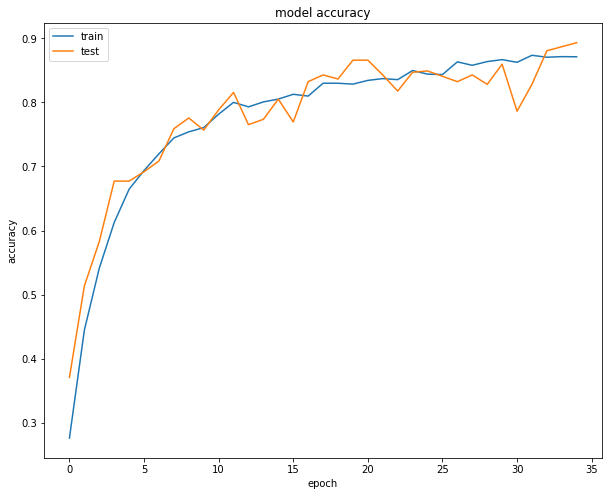

In [107]:
#summarize history for accuracy
plt.plot(history_A.history['accuracy'])
plt.plot(history_A.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

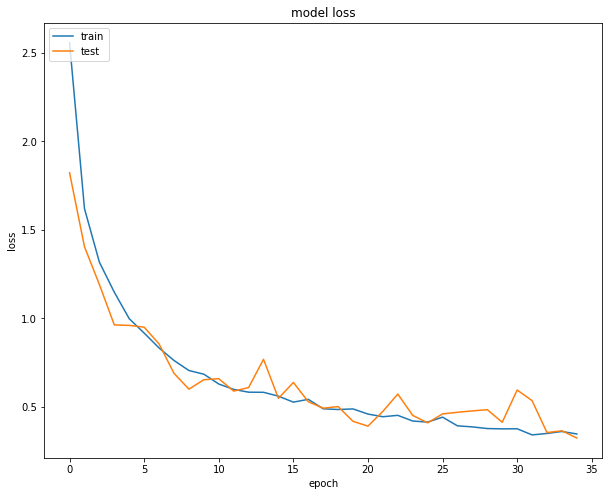

In [108]:
# summarize history for loss
plt.plot(history_A.history['loss'])
plt.plot(history_A.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


# Compare the results from the above step along with your detailed observations on the best performing algorithm and why/how it outperforms other algorithms in this case


*   **Supervised Learning Accuracy 10%**
*   **Neural Network Accuracy 66%**
*   **Convolution Neural Network Accuracy 89%**

From the above we can say CNN has performed better compared to Supervised & Neural Network.CNN has better accuaracy compared to both Network

# Pickle the best performing model.

In [109]:
from keras.models import model_from_json
import numpy
import os

# Pickle model to JSON
Classifier_model_json = CNN_model_A.to_json()
with open("model.json", "w") as json_file:
    json_file.write(Classifier_model_json)
# Pickle weights to HDF5
CNN_model_A.save_weights("model.h5")
print("Saved model to disk")


# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")


Saved model to disk
Loaded model from disk


# Import the the test image [ from the “ Prediction” folder ] to predict the class. Display the image. Use the best trained image classifier model to predict the class.


Image Width 578
Image Height 578


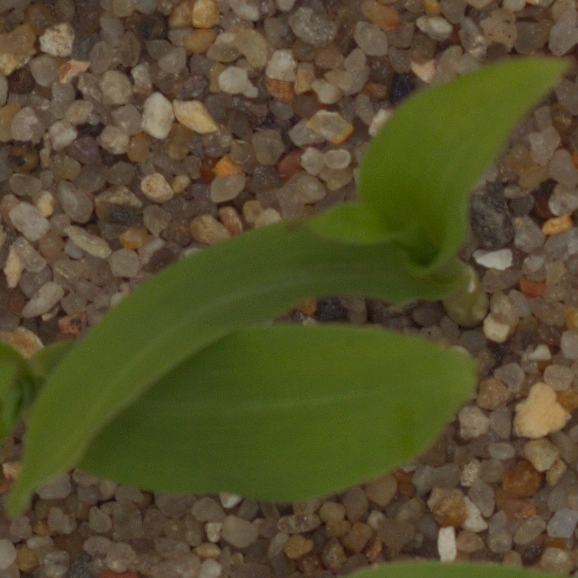

In [110]:
from PIL import  Image

Image_name = "/content/drive/MyDrive/AIML/projects/CV1/prediction/Predict.png"
with Image.open(Image_name) as image:
  width,height=image.size
print("Image Width",width)
print("Image Height",height)
Image.open(Image_name)


In [111]:
global img
Image_name = "/content/drive/MyDrive/AIML/projects/CV1/prediction/Predict.png"
import cv2
img = cv2.imread(Image_name)
image=img.reshape(1,578,578,3)
image.shape
np.all(np.array(image.shape))


True

In [112]:
import cv2
w=71
Image_name = '/content/drive/MyDrive/AIML/projects/CV1/prediction/Predict.png'

img = cv2.imread(Image_name)
image=img.reshape(1,578,578,3)
oriimg = cv2.imread(Image_name, cv2.IMREAD_COLOR)
height, width, depth = oriimg.shape
imgScale = w/width
newX,newY = oriimg.shape[1]*imgScale, oriimg.shape[0]*imgScale
newimg = cv2.resize(oriimg,(int(newX),int(newY)))
newimg.shape
image=newimg.reshape(1,71,71,3)
image.shape


(1, 71, 71, 3)

In [113]:
y_pred = CNN_model_A.predict(image) 
y_pred


array([[1.4373238e-04, 3.8658535e-01, 2.1445187e-04, 2.6449420e-02,
        2.2295413e-07, 5.1911636e-03, 8.4826211e-04, 5.4668254e-01,
        3.9920197e-03, 1.7583974e-02, 1.1772850e-02, 5.3605839e-04]],
      dtype=float32)

In [114]:
answer=np.argmax(y_pred)
print(answer)

7


In [115]:
print("Predicted image is of ",label_names[7])

Predicted image is of  Maize


**'CNN' is used the best trained image classifier model to predict the class,a as it's Accuracy is greater than supervised model and NN model i.e 89% . Predicted image is of  'Maize' class**

# Random selection of images and prediction for the same

Image Width 313
Image Height 313


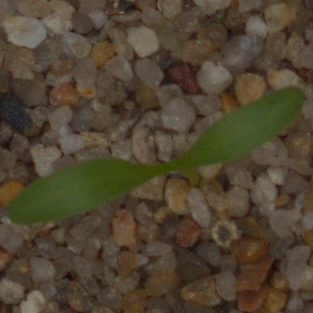

In [116]:
from PIL import  Image

Image_name = "/content/drive/MyDrive/AIML/projects/CV1/test/00c47e980.png"
with Image.open(Image_name) as image:
  width,height=image.size
print("Image Width",width)
print("Image Height",height)
Image.open(Image_name)

In [117]:
global img
Image_name = "/content/drive/MyDrive/AIML/projects/CV1/test/00c47e980.png"
import cv2
img = cv2.imread(Image_name)
image=img.reshape(1,313,313,3)
image.shape
np.all(np.array(image.shape))


True

In [118]:
import cv2
w=71
Image_name = '/content/drive/MyDrive/AIML/projects/CV1/test/00c47e980.png'

img = cv2.imread(Image_name)
image=img.reshape(1,313,313,3)
oriimg = cv2.imread(Image_name, cv2.IMREAD_COLOR)
height, width, depth = oriimg.shape
imgScale = w/width
newX,newY = oriimg.shape[1]*imgScale, oriimg.shape[0]*imgScale
newimg = cv2.resize(oriimg,(int(newX),int(newY)))
newimg.shape
image=newimg.reshape(1,71,71,3)
image.shape


(1, 71, 71, 3)

In [119]:
y_pred = CNN_model_A.predict(image) 
y_pred

array([[3.8561135e-04, 2.0891605e-02, 5.4667831e-05, 3.0562349e-03,
        6.6777349e-05, 4.0811592e-06, 8.2073100e-05, 3.1587456e-03,
        3.1147730e-02, 1.0518730e-03, 5.3012207e-07, 9.4010007e-01]],
      dtype=float32)

In [121]:
answer=np.argmax(y_pred)
print(answer)
print("Predicted image is of ",label_names[11])

11
Predicted image is of  Sugar beet


Image Width 201
Image Height 201


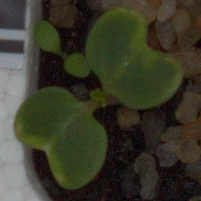

In [122]:
Image_name = "/content/drive/MyDrive/AIML/projects/CV1/test/6df8e31ea.png"
with Image.open(Image_name) as image:
  width,height=image.size
print("Image Width",width)
print("Image Height",height)
Image.open(Image_name)

In [123]:
global img
Image_name = "/content/drive/MyDrive/AIML/projects/CV1/test/6df8e31ea.png"
import cv2
img = cv2.imread(Image_name)
image=img.reshape(1,201,201,3)
image.shape
np.all(np.array(image.shape))

True

In [124]:
import cv2
w=71
Image_name = '/content/drive/MyDrive/AIML/projects/CV1/test/6df8e31ea.png'

img = cv2.imread(Image_name)
image=img.reshape(1,201,201,3)
oriimg = cv2.imread(Image_name, cv2.IMREAD_COLOR)
height, width, depth = oriimg.shape
imgScale = w/width
newX,newY = oriimg.shape[1]*imgScale, oriimg.shape[0]*imgScale
newimg = cv2.resize(oriimg,(int(newX),int(newY)))
newimg.shape
image=newimg.reshape(1,71,71,3)
image.shape


(1, 71, 71, 3)

In [125]:
y_pred = CNN_model_A.predict(image) 
y_pred

array([[5.1899618e-10, 9.9593711e-01, 3.4127976e-03, 2.0668375e-08,
        3.1913533e-08, 7.1076450e-08, 6.7884065e-10, 6.3368567e-08,
        6.2709232e-04, 7.3058959e-06, 1.3631180e-05, 1.8231466e-06]],
      dtype=float32)

In [126]:
answer=np.argmax(y_pred)
print(answer)
print("Predicted image is of ",label_names[1])

1
Predicted image is of  Charlock


Image Width 221
Image Height 221


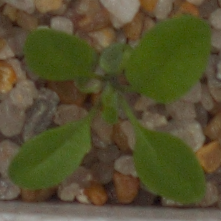

In [127]:
Image_name = "/content/drive/MyDrive/AIML/projects/CV1/test/4bbf1f6ea.png"
with Image.open(Image_name) as image:
  width,height=image.size
print("Image Width",width)
print("Image Height",height)
Image.open(Image_name)

In [128]:
global img
Image_name = "/content/drive/MyDrive/AIML/projects/CV1/test/4bbf1f6ea.png"
import cv2
img = cv2.imread(Image_name)
image=img.reshape(1,221,221,3)
image.shape
np.all(np.array(image.shape))

True

In [129]:
import cv2
w=71
Image_name = '/content/drive/MyDrive/AIML/projects/CV1/test/4bbf1f6ea.png'

img = cv2.imread(Image_name)
image=img.reshape(1,221,221,3)
oriimg = cv2.imread(Image_name, cv2.IMREAD_COLOR)
height, width, depth = oriimg.shape
imgScale = w/width
newX,newY = oriimg.shape[1]*imgScale, oriimg.shape[0]*imgScale
newimg = cv2.resize(oriimg,(int(newX),int(newY)))
newimg.shape
image=newimg.reshape(1,71,71,3)
image.shape


(1, 71, 71, 3)

In [130]:
y_pred = CNN_model_A.predict(image) 
y_pred

array([[1.2171232e-05, 3.4765028e-03, 1.3481748e-05, 2.9756346e-01,
        1.6696697e-08, 9.8799929e-02, 4.2559070e-05, 4.8981054e-04,
        6.8713649e-04, 5.8753085e-01, 1.0974908e-02, 4.0910667e-04]],
      dtype=float32)

In [131]:
answer=np.argmax(y_pred)
print(answer)
print("Predicted image is of ",label_names[9])

9
Predicted image is of  Shepherds Purse
